In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [65]:
def plot_histograms(dt:DataFrame):
    default_par = dict(
        color="#a74e25",
        edgecolor="#5b2a14"
    )
    
    labels = dt["labels"].tolist()
    w_score = dt["w_score"].tolist()
    
    distri_labels = [labels.count(i) for i in range(max(labels)+1)]
    name_label = [*range(max(labels)+1)]
    
    _, axs = plt.subplots(ncols=3,figsize=(18,4))
    
    axs[0].hist(w_score, **default_par)
    axs[0].grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    axs[0].set_title('Distribution of w_score ')
    axs[0].set_xlabel('w_score')
    axs[0].set_ylabel('Frequency')
    
    axs[1].bar(name_label,distri_labels, **default_par)
    axs[1].grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    axs[1].set_title('Distribution of labels')
    axs[1].set_xlabel('Labels')
    axs[1].set_ylabel('Frequency')
    
    axs[2].bar(name_label,distri_labels, **default_par)
    axs[2].set_ylim(0, 600)
    axs[2].grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    axs[2].set_title('Distribution of labels - zoom')
    axs[2].set_xlabel('Labels')
    axs[2].set_ylabel('Frequency')
    
    plt.show()

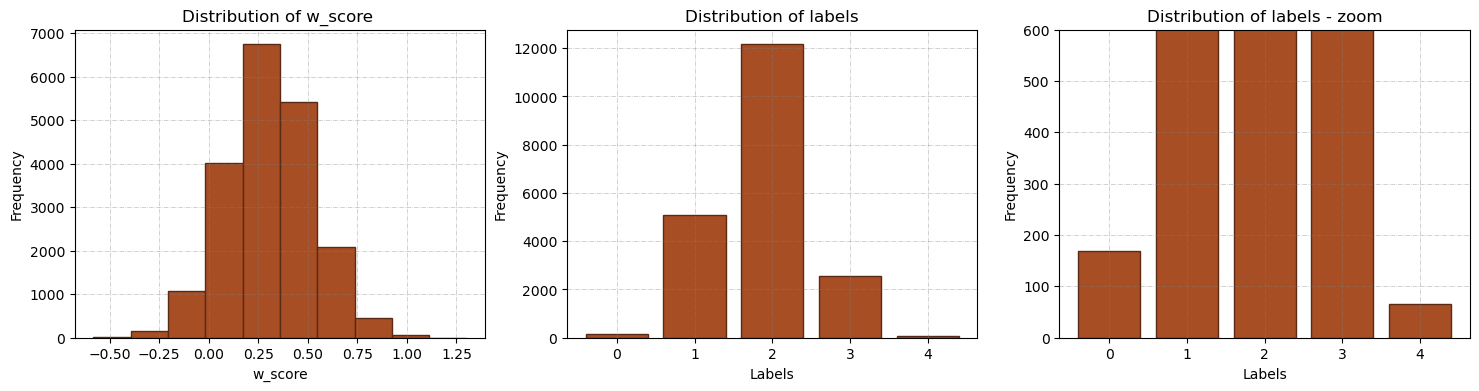

In [66]:
score_dt = pd.read_csv("../outputs/scores.csv")
plot_histograms(score_dt)

In [78]:
class1 = score_dt[score_dt["labels"]==1].sample(frac=0.80).index
class2 = score_dt[score_dt["labels"]==2].sample(frac=0.85).index
class3 = score_dt[score_dt["labels"]==3].sample(frac=0.60).index
rebalanced_dt = score_dt.drop(class1).drop(class2).drop(class3)

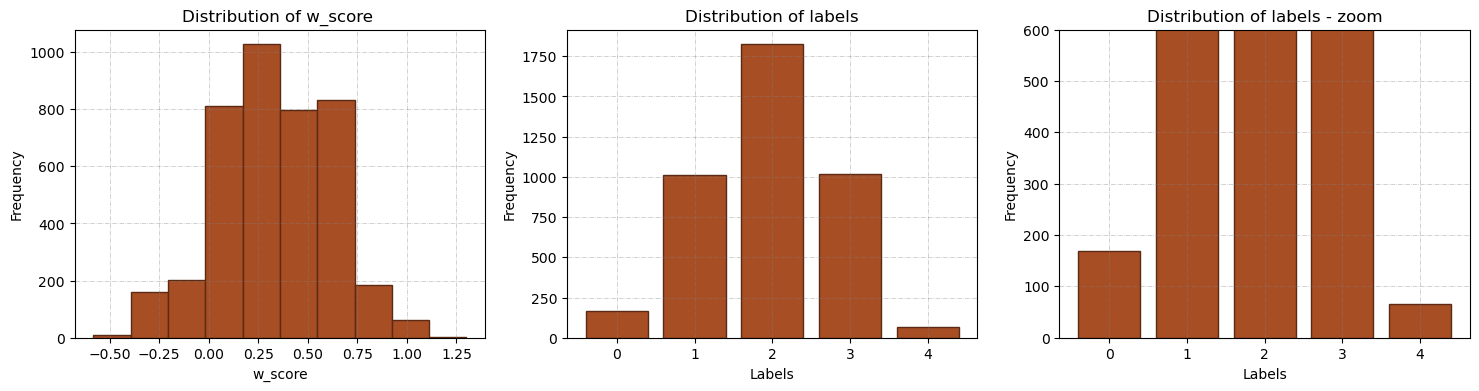

In [79]:
plot_histograms(rebalanced_dt)

In [80]:
rebalanced_dt.to_csv("../outputs/balanced_scores.csv",index=False)